### Jupyter Notebook for section 3.3
This notebook looks at record label representation

In [1]:
import pandas as pd
import numpy as np
import os, re
from datetime import date, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from analysis_utils import CR2, gini

In [2]:
unique_tracks = pd.read_csv('../spotify_data/all_unique_track.csv')
all_tracks = pd.read_csv('../spotify_data/all_tracks_with_labels.csv')
all_genres = pd.read_csv('all_genre_tracks.csv')

In [5]:
label_list = unique_tracks[['album_label']]
print((len(label_list[label_list['album_label'].isna()])/len(label_list)) * 100, '% labels missing')

2.567945643485212 % labels missing


In [4]:
all_tracks[all_tracks['playlist_name']=='NCS_Releases_-_NoCopyrightSounds']

,index,track_name,track_id,date_added,album_name,release_date,track_duration_ms,track_popularity,artist,artist_id,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name,playlist_type,gender,label
205782,185028,Cradles,1y4jsQt7MjnZhiD1L6qFBC,2019-05-09T09:37:15Z,Cradles,2019-01-04,209829,74,Sub Urban,7gXb99Sf9nNmpNYeAgIQFG,...,0.26300,0.000066,0.1710,0.626,79.934,4.0,NCS_Releases_-_NoCopyrightSounds,u,NaN,NCS
205783,185029,Escape,0rUZfWkYvp2SwqxC6Edere,2019-05-10T11:34:14Z,Escape,2019-05-10,220320,30,Diviners,22lnnGKlaDxk8sfzCNRJuA,...,0.09330,0.000000,0.2900,0.112,124.997,4.0,NCS_Releases_-_NoCopyrightSounds,u,1.0,NCS
205784,185030,Until I Die,6B7X512fbfX9GRn9IPLPmV,2019-05-09T09:37:15Z,Until I Die,2019-05-09,139268,30,Tom Wilson,4W9vuLWmzlcGv6stGVWPPC,...,0.25400,0.005970,0.1270,0.467,163.943,4.0,NCS_Releases_-_NoCopyrightSounds,u,NaN,NCS
205785,185031,Stars,6ycR39gJUREuGH48AOZH6l,2019-05-09T09:37:15Z,Stars,2019-05-01,228413,46,Diamond Eyes,7u7MDzwo7VtVe7FhS3cq8Y,...,0.00417,0.000436,0.0933,0.343,144.850,4.0,NCS_Releases_-_NoCopyrightSounds,u,0.0,NCS
205786,185032,WILDFIRE,5HnioK8yPcyuKtV55O6QTW,2019-05-09T09:37:15Z,WILDFIRE,2019-05-03,183757,44,Jim Yosef,40HDiLfKm0tXk2FxlJx6aO,...,0.02100,0.000000,0.1380,0.252,160.961,4.0,NCS_Releases_-_NoCopyrightSounds,u,1.0,NCS
205787,185033,Prism,3FM0F9u4q6G4uGiu5pXIov,2019-05-09T09:37:15Z,Prism,2019-04-18,214193,49,Summer Was Fun,13H2PbDHYtjo8v0R8HMAao,...,0.05540,0.000000,0.1290,0.150,93.115,4.0,NCS_Releases_-_NoCopyrightSounds,u,NaN,NCS
205788,185034,Go Home,1j6IBKTxEYmlYITveRwmwx,2019-05-09T09:37:15Z,Go Home,2019-04-19,224669,48,Maduk,6TaaqqCMRMSpvNHClfnbEL,...,0.00361,0.021000,0.2570,0.314,174.990,4.0,NCS_Releases_-_NoCopyrightSounds,u,1.0,NCS
205789,185035,Perfect 10 - Unknown Brain & RudeLies VIP,6mc99wTNRosi4OFR9w9H1G,2019-05-09T09:37:15Z,Perfect 10 (Unknown Brain & RudeLies VIP),2019-04-26,157734,48,Unknown Brain,0okpgBQamDqOZazBeH0J3I,...,0.02120,0.000000,0.1820,0.577,128.090,4.0,NCS_Releases_-_NoCopyrightSounds,u,1.0,NCS
205790,185036,Thunder,31voEq1LtOmYukCo2eeQA5,2019-05-09T09:37:15Z,Thunder,2019-05-07,162000,32,Simbai,3crJf5p7nUHziLEGTlikzg,...,0.05290,0.002020,0.2980,0.204,95.034,4.0,NCS_Releases_-_NoCopyrightSounds,u,NaN,NCS
205791,185037,Clear My Head,45vW6Apg3QwawKzBi03rgD,2019-05-09T09:37:15Z,Clear My Head,2019-02-18,217142,56,Ellis,00CYRdkMnA0mwfy1VQPA7X,...,0.12900,0.000000,0.1550,0.378,125.993,4.0,NCS_Releases_-_NoCopyrightSounds,u,1.0,NCS


In [6]:
def get_label_count(tracks):
    label_dict = {}
    for i in range(0,len(tracks)):
        label = tracks.iloc[i,0]
        if label is np.nan: continue
        labels = label.split('/')
        for label in labels:
            label_dict[label] = label_dict.get(label, 0) + 1

    labels_unique = pd.DataFrame.from_dict(label_dict, orient = 'index').reset_index()
    labels_unique.columns = ['label', 'count']
    
    return labels_unique

In [7]:
# function to calculate top 2 concentration ratio. input df with labels
def CR2(tracks):
    label_dict = {}
    is_na = 0
    for i in range(0,len(tracks)):
        label = tracks.iloc[i,0]
        if label is np.nan:
            is_na += 1
            continue
        labels = label.split('/')
        for label in labels:
            label_dict[label] = label_dict.get(label, 0) + 1

    labels = pd.DataFrame.from_dict(label_dict, orient = 'index').reset_index()
    labels.columns = ['label', 'count']
    labels = labels.sort_values(by=['count'], ascending=False)
    total = len(tracks) - is_na
    l1 = labels.iloc[0,1]
    l2 = labels.iloc[1,1]
    
    return (l1+l2)/total

In [8]:
all_tracks = all_tracks.replace({'RCA Records Label': 'RCA Records'})
all_tracks = all_tracks.replace({'WALT DISNEY RECORDS': 'Walt Disney Records'})
unique_tracks = unique_tracks.replace({'RCA Records Label': 'RCA Records'})
all_genres = all_genres.replace({'RCA Records Label': 'RCA Records'})

In [18]:
print('CR2 for all tracks: ', CR2(all_tracks[['label']])*100)

CR2 for all tracks:  7.46276976245111


In [17]:
print('CR2 for unique tracks: ', CR2(unique_tracks[['album_label']])*100)

CR2 for unique tracks:  6.5736847502820215


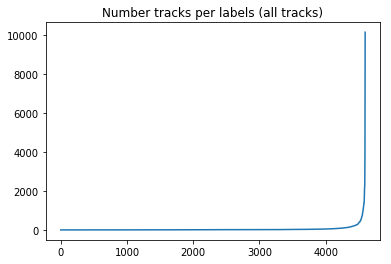

In [19]:
all_array = np.asarray(get_label_count(all_tracks[['label']])['count'])
all_array.sort()
plt.title('Number tracks per labels (all tracks)')
plt.plot(all_array)
plt.savefig('.png')

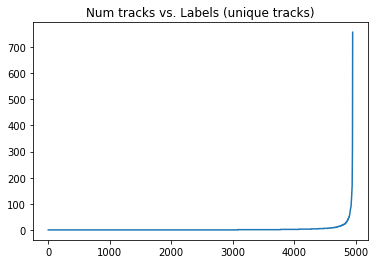

In [12]:
unique_array = np.asarray(get_label_count(unique_tracks[['album_label']])['count'])
unique_array.sort()
plt.title('Num tracks vs. Labels (unique tracks)')
plt.plot(unique_array)

### By Class

In [20]:
scl = all_tracks[all_tracks['playlist_type']=='s']
#print('CR2 for SCL tracks: ', CR2(scl[['label']])*100)

In [21]:
ucl = all_tracks[all_tracks['playlist_type']=='u']
#print('CR2 for UCL tracks: ', CR2(ucl[['label']])*100)

In [22]:
print('Gini for SCL: ', gini(np.asarray(get_label_count(scl[['label']])['count'])))

Gini for SCL:  0.7306917003955271


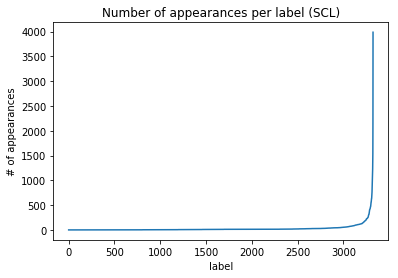

In [32]:
scl_array = np.asarray(get_label_count(scl[['label']])['count'])
scl_array.sort()
plt.title('Number of appearances per label (SCL)')
plt.plot(scl_array)
plt.xlabel('label')
plt.ylabel('# of appearances')
plt.savefig('num_label_SCL.png')

In [33]:
print('Gini for UCL: ', gini(np.asarray(get_label_count(ucl[['label']])['count'])))

Gini for UCL:  0.8083117829069344


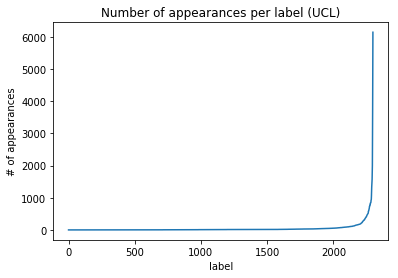

In [34]:
ucl_array = np.asarray(get_label_count(ucl[['label']])['count'])
ucl_array.sort()
plt.title('Number of appearances per label (UCL)')
plt.plot(ucl_array)
plt.xlabel('label')
plt.ylabel('# of appearances')
plt.savefig('num_label_UCL.png')

### By Genre

#### CR2

In [55]:
hip_hop = all_genres[all_genres['genre']=='hh']
print('CR2 for hip-hop: ', CR2(hip_hop[['label']])*100)

CR2 for hip-hop:  11.898454746136865


In [51]:
pop = all_genres[all_genres['genre']=='pp']
print('CR2 for pop: ', CR2(pop[['label']])*100)

CR2 for pop:  11.378399666404114


In [54]:
rock = all_genres[all_genres['genre']=='rk']
print('CR2 for rock: ', CR2(rock[['label']])*100)

CR2 for rock:  10.405972935137656


In [57]:
blues = all_genres[all_genres['genre']=='bl']
print('CR2 for blues: ', CR2(blues[['label']])*100)

CR2 for blues:  24.925373134328357


In [58]:
rap = all_genres[all_genres['genre']=='rp']
print('CR2 for rap: ', CR2(rap[['label']])*100)

CR2 for rap:  11.914413620501252


In [59]:
country = all_genres[all_genres['genre']=='ct']
print('CR2 for country: ', CR2(country[['label']])*100)

CR2 for country:  25.475710767853144


In [60]:
elec = all_genres[all_genres['genre']=='el']
print('CR2 for electronic: ', CR2(elec[['label']])*100)

CR2 for electronic:  11.256659354434346


In [61]:
folk = all_genres[all_genres['genre']=='fk']
print('CR2 for folk: ', CR2(folk[['label']])*100)

CR2 for folk:  7.768457643769365


In [62]:
indie = all_genres[all_genres['genre']=='in']
print('CR2 for indie: ', CR2(indie[['label']])*100)

CR2 for indie:  5.702592087312415


In [63]:
jazz = all_genres[all_genres['genre']=='jz']
print('CR2 for jazz: ', CR2(jazz[['label']])*100)

CR2 for jazz:  22.801057002642505


In [64]:
house = all_genres[all_genres['genre']=='hs']
print('CR2 for house: ', CR2(house[['label']])*100)

CR2 for house:  10.837542087542088


In [65]:
r_b = all_genres[all_genres['genre']=='rb']
print('CR2 for r&b/soul: ', CR2(r_b[['label']])*100)

CR2 for r&b/soul:  20.79616660523406


In [66]:
latin = all_genres[all_genres['genre']=='la']
print('CR2 for latin: ', CR2(latin[['label']])*100)

CR2 for latin:  26.02618542108988


#### Gini (label appearances)

In [82]:
hip_labels = get_label_count(hip_hop[['label']])

In [107]:
print('Gini coefficient for hip hop: ', gini(np.asarray(get_label_count(hip_hop[['label']])['count'])))

Gini coefficient for hip hop:  0.754433602478808


In [100]:
print('Gini coefficient for pop: ', gini(np.asarray(get_label_count(pop[['label']])['count'])))

Gini coefficient for pop:  0.7976045155326572


In [108]:
print('Gini coefficient for electronic: ', gini(np.asarray(get_label_count(elec[['label']])['count'])))

Gini coefficient for electronic:  0.7668095792657496


In [109]:
print('Gini coefficient for rock: ', gini(np.asarray(get_label_count(rock[['label']])['count'])))

Gini coefficient for rock:  0.7059357698197668


In [110]:
print('Gini coefficient for country: ', gini(np.asarray(get_label_count(country[['label']])['count'])))

Gini coefficient for country:  0.6998552190555523


In [111]:
print('Gini coefficient for latin: ', gini(np.asarray(get_label_count(latin[['label']])['count'])))

Gini coefficient for latin:  0.8059830305166069


In [112]:
print('Gini coefficient for indie: ', gini(np.asarray(get_label_count(indie[['label']])['count'])))

Gini coefficient for indie:  0.6497577969642481


In [113]:
print('Gini coefficient for house: ', gini(np.asarray(get_label_count(house[['label']])['count'])))

Gini coefficient for house:  0.7784826577313779


In [114]:
print('Gini coefficient for rap: ', gini(np.asarray(get_label_count(rap[['label']])['count'])))

Gini coefficient for rap:  0.7601384302699404


In [115]:
print('Gini coefficient for blues: ', gini(np.asarray(get_label_count(blues[['label']])['count'])))

Gini coefficient for blues:  0.5924645892351275


In [116]:
print('Gini coefficient for jazz: ', gini(np.asarray(get_label_count(jazz[['label']])['count'])))

Gini coefficient for jazz:  0.5374454032172153


In [117]:
print('Gini coefficient for r&b/soul: ', gini(np.asarray(get_label_count(r_b[['label']])['count'])))

Gini coefficient for r&b/soul:  0.7289207168477781


In [290]:
print('Gini coefficient for folk: ', gini(np.asarray(get_label_count(folk[['label']])['count'])))

Gini coefficient for folk:  0.5815292941935714


In [158]:
print('top 10 label track appearance count:', labels_all.sort_values(by=['count'], ascending=False).head(10)['count'].sum())

top 10 label track appearance count: 40319


In [164]:
for i in range(0,4000):
    num = labels_all.sort_values(by=['count']).head(i)['count'].sum()
    if num >= 40319: 
        print('number of labels:', i) 
        break

number of labels: 3854


In [166]:
labels_all.sort_values(by=['count']).head(3853)['count'].sum()

40313

In [173]:
labels_scl = get_label_count(scl[['label']])
labels_ucl = get_label_count(ucl[['label']])

In [174]:
print('top 10 label track appearance count (scl):', labels_scl.sort_values(by=['count'], ascending=False).head(10)['count'].sum())

top 10 label track appearance count (scl): 15435


In [170]:
for i in range(0,4000):
    num = labels_scl.sort_values(by=['count']).head(i)['count'].sum()
    if num >= 15435: 
        print('number of labels:', i) 
        break

number of labels: 2211


In [172]:
print('number of SCL labels: ', len(labels_scl))

number of SCL labels:  3324


In [175]:
print('top 10 label track appearance count (ucl):', labels_ucl.sort_values(by=['count'], ascending=False).head(10)['count'].sum())

top 10 label track appearance count (ucl): 27715


In [178]:
for i in range(0,4000):
    num = labels_ucl.sort_values(by=['count']).head(i)['count'].sum()
    if num >= 27715: 
        print('number of labels:', i) 
        break

number of labels: 2057


In [179]:
print('number of UCL labels: ', len(labels_ucl))

number of UCL labels:  2301


In [191]:
unique_scl = scl.drop_duplicates(subset=['track_id'])
unique_ucl = ucl.drop_duplicates(subset=['track_id'])

In [192]:
unique_labels_scl = get_label_count(unique_scl[['label']])
unique_labels_ucl = get_label_count(unique_ucl[['label']])

In [200]:
len(unique_labels_scl[unique_labels_scl['count']==1])

1974

In [201]:
len(unique_labels_scl[unique_labels_scl['count']==1])/len(unique_labels_scl)*100

62.13408876298395

In [203]:
len(unique_labels_ucl[unique_labels_ucl['count']==1])

1370

In [202]:
len(unique_labels_ucl[unique_labels_ucl['count']==1])/len(unique_labels_ucl)*100

62.30104592996817

In [226]:
plt.scatter([,
            np.float64(df_user_add[['track_popularity']]),
            facecolors='none', edgecolors='C0')
plt.title('Track Popularity vs. Artist Popularity at addition (User Curated)')
plt.xlabel('Artist Popularity')
plt.ylabel('Track Popularity')

,index,track_name,track_id,date_added,album_name,release_date,track_duration_ms,track_popularity,artist,artist_id,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name,playlist_type,gender,label
0,0,Cecilia - Single Mix,11CeyEFt21BvAICfd4U8FA,2019-04-02T07:28:58Z,Greatest Hits,1972-06-14,169560,65,Simon & Garfunkel,70cRZdQywnSFp9pnc2WTCE,...,0.4090,0.000013,0.0916,0.965,104.765,4.0,Classic_Road_Trip_Songs,s,1.0,Legacy Recordings
1,1,Hey Jude - Remastered 2015,3H7sv3Krffn15BufUuXzf3,2019-04-02T07:28:58Z,1 (Remastered),2000-11-13,425653,23,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,...,0.0112,0.000014,0.0880,0.532,147.207,4.0,Classic_Road_Trip_Songs,s,1.0,UMC (Universal Music Catalogue)
2,2,Your Song,17VegeBoHvMlIByrdu64KR,2019-04-02T07:28:58Z,Elton John (Remastered Version),1970-04-10,244226,24,Elton John,3PhoLpVuITZKcymswpck5b,...,0.8510,0.000007,0.0966,0.289,128.221,4.0,Classic_Road_Trip_Songs,s,1.0,Decca
3,3,Walk Of Life,4xxB8QUtn8rF4Z2yaRICqp,2019-04-02T07:28:58Z,The Best of Dire Straits & Mark Knopfler - Pri...,2005-11-07,248906,18,Dire Straits,0WwSkZ7LtFUFjGjMZBMt6T,...,0.3560,0.000143,0.1630,0.772,172.377,4.0,Classic_Road_Trip_Songs,s,1.0,Mercury Records Limited
4,4,You're so Vain,2DnJjbjNTV9Nd5NOa1KGba,2019-04-02T07:28:58Z,No Secrets,1972,258411,74,Carly Simon,4FtSnMlCVxCswABUmdhwpm,...,0.1570,0.000007,0.0784,0.647,106.186,4.0,Classic_Road_Trip_Songs,s,0.0,EMI Norway


### Label Gini Coefficients

In [25]:
unique_lists = scl['playlist_name'].unique()
names = []
gini_coefs = []
cr2 = []
for playlist in unique_lists:
    names.append(playlist)
    tracks = scl[scl['playlist_name']==playlist]
    counts = get_label_count(tracks[['label']])
    gini_coefs.append(gini(np.asarray(counts['count'])))
    top_2 = counts.sort_values(by=['count'], ascending=False).head(2)
    l1 = top_2.iloc[0,1]
    l2 = top_2.iloc[1,1]
    cr2.append((l1+l2)/counts['count'].sum())
                      
list_labels_scl = pd.DataFrame()
list_labels_scl['playlist_name'] = names
list_labels_scl['gini'] = gini_coefs
list_labels_scl['cr2'] = cr2

In [27]:
unique_lists = ucl['playlist_name'].unique()
names = []
gini_coefs = []
cr2 = []
for playlist in unique_lists:
    names.append(playlist)
    tracks = ucl[ucl['playlist_name']==playlist]
    counts = get_label_count(tracks[['label']])
    gini_coefs.append(gini(np.asarray(counts['count'])))
    top_2 = counts.sort_values(by=['count'], ascending=False).head(2)
    l1 = top_2.iloc[0,1]
    l2 = top_2.iloc[1,1]
    cr2.append((l1+l2)/counts['count'].sum())
                      
list_labels_ucl = pd.DataFrame()
list_labels_ucl['playlist_name'] = names
list_labels_ucl['gini'] = gini_coefs
list_labels_ucl['cr2'] = cr2

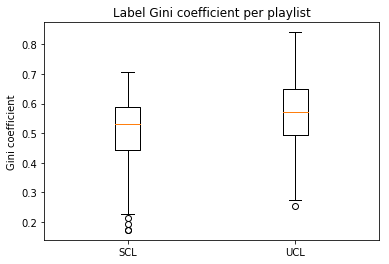

In [28]:
fig, ax = plt.subplots()
ax.set_title('Label Gini coefficient per playlist')
ax.boxplot([np.asarray(list_labels_scl['gini']), np.asarray(list_labels_ucl['gini'])])
ax.set_xticklabels(['SCL', 'UCL'])
plt.ylabel('Gini coefficient')
plt.savefig('gini_label_boxplot.png')

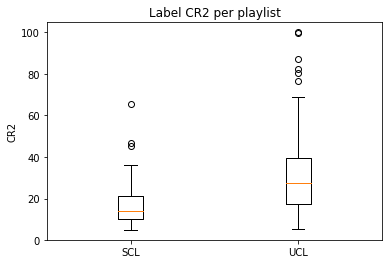

In [31]:
fig, ax = plt.subplots()
ax.set_title('Label CR2 per playlist')
ax.boxplot([np.asarray(list_labels_scl['cr2']*100), np.asarray(list_labels_ucl['cr2']*100)])
ax.set_xticklabels(['SCL', 'UCL'])
plt.ylabel('CR2')
plt.
plt.savefig('cr2_label_boxplot.png')

In [287]:
unique_lists = scl['playlist_name'].unique()
names = []
gini_coefs = []
cr2 = []
top_labels = []
for playlist in unique_lists:
    top_2_labels = []
    names.append(playlist)
    tracks = scl[scl['playlist_name']==playlist]
    counts = get_label_count(tracks[['label']])
    gini_coefs.append(gini(np.asarray(counts['count'])))
    top_2 = counts.sort_values(by=['count'], ascending=False).head(2)
    l1 = top_2.iloc[0,1]
    l2 = top_2.iloc[1,1]
    cr2.append((l1+l2)/counts['count'].sum())
    l1 = top_2.iloc[0,0]
    l2 = top_2.iloc[1,0]
    top_2_labels.append(l1)
    top_2_labels.append(l2)
    top_labels.append(top_2_labels)
                      
list_labels_scl = pd.DataFrame()
list_labels_scl['playlist_name'] = names
list_labels_scl['gini'] = gini_coefs
list_labels_scl['cr2'] = cr2
list_labels_scl['top_2'] = top_labels

In [288]:
list_labels_scl.sort_values(by=['cr2'], ascending=False)

,playlist_name,gini,cr2,top_2
42,Esquenta_Sertanejo,0.650641,0.655034,"[Som Livre, Sony Music Entertainment]"
50,Pop_Brasil,0.689503,0.468750,"[Universal Music International Ltda., WM Brazil]"
54,Funk_Hits,0.603184,0.452794,"[WM Brazil, GR6 MUSIC]"
29,Top_Brasil,0.668295,0.361222,"[WM Brazil, Som Livre]"
72,Baladas_Románticas,0.707233,0.331143,"[Columbia, Sony Music Latin]"
31,¡Viva_Latino!,0.573233,0.325088,"[Sony Music Latin, UMLE - Latino]"
8,Hit_Rewind,0.643487,0.313295,"[Now! Music, Columbia]"
11,Rock_en_Español,0.695154,0.302832,"[WM Mexico, Columbia]"
24,K-Pop_Daebak,0.532872,0.300546,"[YG Entertainment, SM Entertainment]"
34,Esenciales,0.664421,0.281853,"[Columbia, WM Mexico]"


In [261]:
list_labels_scl.describe()

,gini,cr2
count,74.000000,74.000000
mean,0.504048,0.173081
std,0.131049,0.105795
min,0.173369,0.049398
25%,0.443945,0.100984
50%,0.529876,0.141805
75%,0.589464,0.213750
max,0.707233,0.655034


In [289]:
list_labels_ucl.describe()

,gini,cr2
count,74.000000,74.000000
mean,0.573123,0.324499
std,0.125110,0.217574
min,0.252869,0.056075
25%,0.494961,0.175099
50%,0.571696,0.275987
75%,0.648425,0.395351
max,0.841065,1.000000
